In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
dir = "/content/drive/MyDrive/News Data"
# os.chdir(dir)

In [ ]:
# !pip install --upgrade tensorflow


In [ ]:
os.listdir(dir)

['articles1.csv',
 'articles2.csv',
 'articles3.csv',
 'historic_articles.csv',
 'All The News.zip',
 'For Testing.zip',
 'Unzipped All The News',
 'news_filtered.csv',
 'bias.json',
 'variables',
 'assets',
 'model',
 'checkpoint',
 '<tensorflow.python.keras.engine.functional.Functional object at 0x7f20810b3828>_weights.best.hdf5',
 'news_bias.csv',
 'model_weights.best.hdf5',
 'checkpoint.data-00000-of-00001',
 'checkpoint.index',
 'saved_model.pb']

In [ ]:
!pip install tensorflow_text

     |████████████████████████████████| 3.4MB 7.5MB/s 


lfdklajl

In [ ]:
import tensorflow_text as text  # Registers the ops.
import tensorflow as tf
from tensorflow.keras import activations
import tensorflow_hub as hub
tf.keras.backend.clear_session()

# text_input = ["This is a sample sentence."]
head_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name = "head")

cont_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name = "cont")
head = tf.strings.regex_replace(head_input,
                         r'(\\x(.){2})', " ")
cont = tf.strings.regex_replace(cont_input,
                         r'(\\x(.){2})', " ")
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1")
head_encoder_inputs = preprocessor(head) # dict with keys: 'input_mask', 'input_type_ids', 'input_word_ids'
head_encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3",
    trainable=True)
cont_encoder_inputs = preprocessor(cont)
cont_encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3",
    trainable=True)

dense_3 = tf.keras.layers.Dense(256,activation=activations.relu)
output_layer = tf.keras.layers.Dense(6, activation = activations.softmax)
head_out = head_encoder(head_encoder_inputs)["pooled_output"]      # [batch_size, 768].
cont_out = cont_encoder(cont_encoder_inputs)["pooled_output"]      # [batch_size, 768].
merged = tf.concat([head_out, cont_out], -1)

x = dense_3(merged)
output = output_layer(x)

model = tf.keras.Model(inputs=[head_input, cont_input], outputs=output)
# sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].

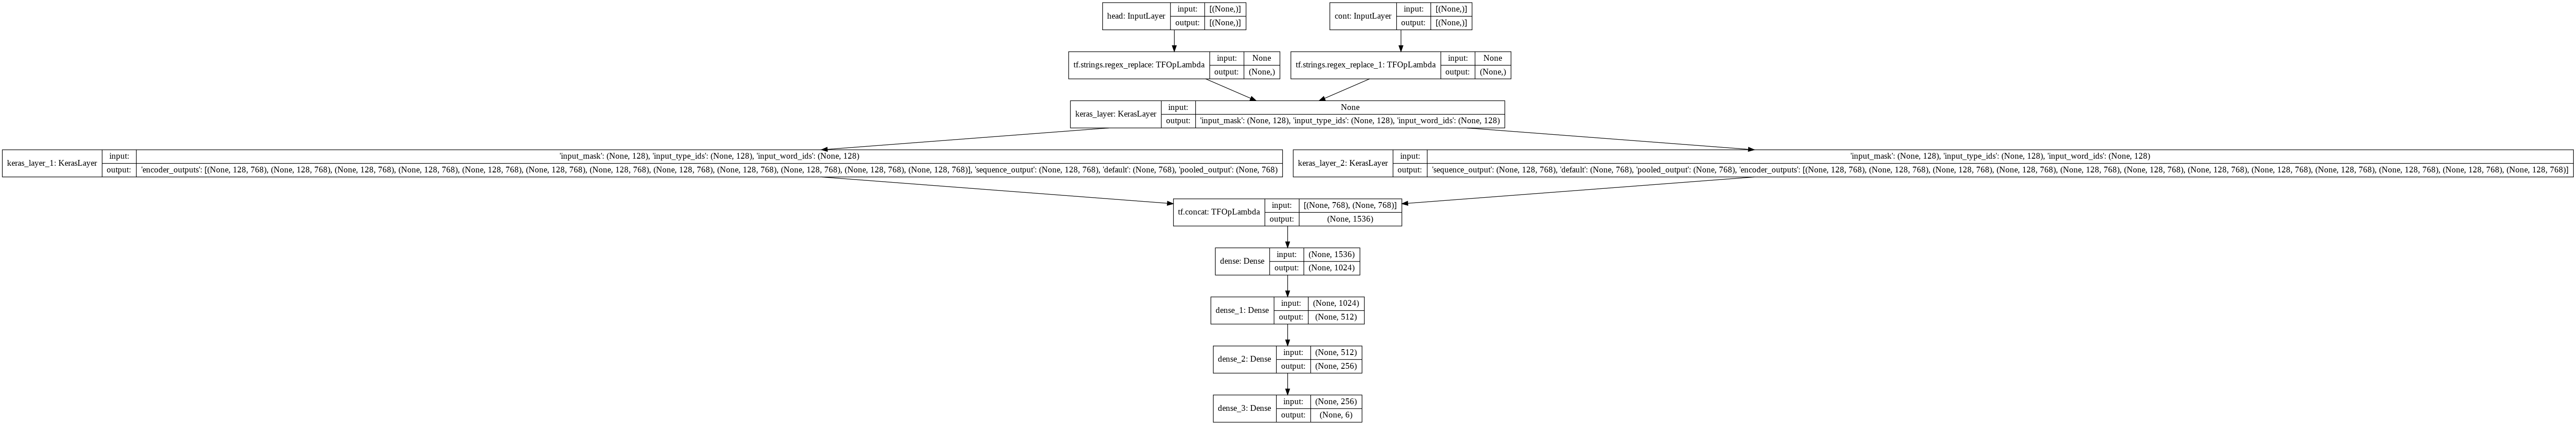

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
model.save("/content/drive/MyDrive/News Data")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/News Data/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/News Data/assets


In [ ]:
import pandas as pd
data = pd.read_csv(dir + "/news_bias.csv").drop(columns = ["Unnamed: 0"])
data.head()

,title,content,bias
0,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,3
1,Rift Between Officers and Residents as Killing...,"After the bullet shells get counted, the blood...",3
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...","When Walt Disney’s “Bambi” opened in 1942, cri...",3
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...","Death may be the great equalizer, but it isn’t...",3
4,Kim Jong-un Says North Korea Is Preparing to T...,"SEOUL, South Korea — North Korea’s leader, ...",3


In [ ]:
def getbias(x):
    if x in [0,4,5]:
        return 1
    elif x in [2,3]:
        return 2
    else :
        return 0
data["bias"] = data["bias"].apply(getbias)

In [ ]:
data.dtypes

title      object
content    object
bias        int64
dtype: object

In [ ]:
data = data[data.isna().any(axis=1) != True]

In [ ]:
data["title"] = data["title"].astype("string")
data["content"] = data["content"].astype("string")

In [ ]:
data["data"] = data["title"] + " "+ data["content"]

In [ ]:
data["content"][0]

'WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been 

In [ ]:
import numpy as np
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [ ]:
test["bias"].value_counts()

2    16123
1    10581
0     2200
Name: bias, dtype: int64

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 130kB/s 
     |████████████████████████████████| 6.8MB 34.7MB/s 
     |████████████████████████████████| 983kB 49.8MB/s 
     |████████████████████████████████| 266kB 46.2MB/s 
     |████████████████████████████████| 1.9MB 47.1MB/s 
     |████████████████████████████████| 1.2MB 48.2MB/s 
     |████████████████████████████████| 471kB 47.5MB/s 
     |████████████████████████████████| 3.2MB 42.9MB/s 
     |████████████████████████████████| 890kB 44.7MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=e74569769cac97dca40c04c354f36f0b053a6d614e8ceb8c83bffed50ed39872
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=e6c9c7ef25e582b58c9c0e506b0074945c3beeeff7fbbfc2c39a1206d819fcd0
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
import tensorflow as tf
import ktrain
from ktrain import text


In [ ]:
import numpy as np

x_train =np.asarray(train['data'])
y_train = np.asarray(train['bias'])
x_test = np.asarray(test['data'])
y_test = np.asarray(test['bias'])

In [ ]:
trn, val, preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                          x_test=x_test, y_test=y_test,
                                          class_names=["neutral", "right-bias", "left-bias"],
                                          preprocess_mode='distilbert',
                                          maxlen=350)


preprocessing train...
language: en
train sequence lengths:
	mean : 749
	95percentile : 1744
	99percentile : 3283


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 756
	95percentile : 1775
	99percentile : 3365


task: text classification


In [ ]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [ ]:
model = text.text_classifier('distilbert', train_data=trn, preproc=preproc)


Is Multi-Label? False
maxlen is 350



done.


In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)


In [ ]:
learner.fit_onecycle(3e-5, 6)




begin training using onecycle policy with max lr of 3e-05...
Epoch 1/6
19206/19206 [==============================] - 3178s 164ms/step - loss: 0.3733 - accuracy: 0.8374 - val_loss: 0.1589 - val_accuracy: 0.9333
Epoch 2/6
19206/19206 [==============================] - 3168s 164ms/step - loss: 0.1318 - accuracy: 0.9477 - val_loss: 0.1245 - val_accuracy: 0.9505
Epoch 3/6
19206/19206 [==============================] - 3175s 164ms/step - loss: 0.0989 - accuracy: 0.9620 - val_loss: 0.1245 - val_accuracy: 0.9510
Epoch 4/6
19206/19206 [==============================] - 3136s 162ms/step - loss: 0.0686 - accuracy: 0.9751 - val_loss: 0.1416 - val_accuracy: 0.9549
Epoch 5/6
  970/19206 [>.............................] - ETA: 46:11 - loss: 0.0302 - accuracy: 0.9910

In [ ]:
p = ktrain.get_predictor(model, preproc)

In [ ]:
p.save('/content/drive/My Drive/bert')

In [ ]:
from keras.utils.np_utils import to_categorical   

categorical_labels_train = to_categorical(train["bias"].values)
categorical_labels_train

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
(categorical_labels_train[categorical_labels_train[:,3] != 1])

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
categorical_labels_test = to_categorical(test["bias"].values)
categorical_labels_test

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
import tensorflow as tf

train_target = tf.data.Dataset.from_tensor_slices(categorical_labels_train)
train_title = tf.data.Dataset.from_tensor_slices(train["title"].values)
train_cont = tf.data.Dataset.from_tensor_slices(train["content"].values)
train_dataset = tf.data.Dataset.zip((train_cont, train_title)).map(lambda x1, x2: {'cont': x1, 'head': x2})
train_xy = tf.data.Dataset.zip((train_dataset, train_target))

In [ ]:
test_target = tf.data.Dataset.from_tensor_slices(categorical_labels_test)
test_title = tf.data.Dataset.from_tensor_slices(test["title"].values)
test_cont = tf.data.Dataset.from_tensor_slices(test["content"].values)
test_dataset = tf.data.Dataset.zip((test_cont, test_title)).map(lambda x1, x2: {'cont': x1, 'head': x2})
test_xy = tf.data.Dataset.zip((test_dataset, test_target))

In [ ]:
for feat, targ in train_xy.take(5):
  print ('Features: {}, Target: {}'.format(feat["cont"], targ))

Features: b'WASHINGTON  \xe2\x80\x94   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration\xe2\x80\x99s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering c

In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
import time
Patience=2
BestModelWeightsPath = f"checkpoint/model{time.time()}"
checkpoint = ModelCheckpoint(
    BestModelWeightsPath,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only = True
)
reduceLROnPlat = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=Patience,
    verbose=1,
    mode='auto',
    cooldown=2,
    min_lr=1e-7
)
early = EarlyStopping(
    monitor="val_accuracy",
    mode="auto",
    patience=Patience*2,
    restore_best_weights=True
)
callbacks_list= [early, reduceLROnPlat, checkpoint]


In [ ]:
  EPOCHS = 100
  BATCH_SIZE = 16
  model.fit(train_xy.shuffle(10000).batch(BATCH_SIZE), validation_data= test_xy.shuffle(10000).batch(BATCH_SIZE), epochs = EPOCHS, callbacks=callbacks_list)

Epoch 1/100
1907/7214 [======>.......................] - ETA: 2:26:46 - loss: 0.8040 - accuracy: 0.6144

In [ ]:
model.save("newsmodel.h5")